![title](img1.png)

In [2]:
import numpy as np
from matplotlib import pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [62]:
class LP(object):
    def __init__(self, A: np.array, b: np.array, c: np.array):
        self.A = A
        self.b = b
        self.c = c
        self.n, self.m = A.shape
        self.solution = None
        self.start_solution = None
        self.basis = None

        self.simplex = np.zeros(shape=(self.n + 1, self.n + self.m + 2))
        self.simplex[:-1, : self.m] = A
        self.simplex[:-1, self.m : -2] = np.identity(n=self.n)
        self.simplex[-1, : self.m] = -c
        self.simplex[-1, -2] = 1
        self.simplex[:-1, -1] = b

        # print(self.simplex.astype('int32'))

    def get_start_solution(self):
        pass

    def simplex_method(self):
        while True:
            pivot_col = np.argmin(self.simplex[-1, :-2])
            indicator = self.simplex[-1, pivot_col]

            if indicator >= 0:
                print("Simplex table is optimized")
                break

            min_value = 10**10
            has_first = False
            pivot_row = 0

            for i in range(self.n):
                if (
                    self.simplex[i, pivot_col] > 0
                    and self.simplex[i, -1] / self.simplex[i, pivot_col] < min_value
                ):
                    min_value = self.simplex[i, -1] / self.simplex[i, pivot_col]
                    pivot_row = i
                    has_first = True

            if not has_first:
                print("Maximum is not feasible")
                break

            self.pivot(np.array([pivot_row, pivot_col]))

    def pivot(self, pivot_indx: np.array):
        p_i, p_j = pivot_indx
        pivot_val = self.simplex[p_i, p_j]

        if pivot_val == 0:
            return

        for i in range(self.n + 1):
            cur_val = self.simplex[i, p_j]

            if p_i != i and cur_val != 0:
                self.simplex[i, :] = (
                    self.simplex[i, :] * pivot_val - self.simplex[p_i, :] * cur_val
                )

                if self.simplex[i, -1] < 0:
                    self.simplex[i, :] *= -1

                if self.simplex[-1, -2] < 0:
                    self.simplex[-1, :] *= -1

    def get_basis(self):
        basis_indx = []

        for j in range(self.n + self.m + 1):
            if len(self.simplex[self.simplex[:, j] != 0]) == 1:
                basis_indx.append(j)
        
        basis_indx = np.array(basis_indx)
        self.basis = basis_indx.astype('int32')

    def get_optimum(self):
        A_inv = np.linalg.inv(self.simplex[:, self.basis])
        self.solution = A_inv.dot(self.simplex[:, -1])

        return self.solution

In [71]:
A = np.array([
    [1, 2], 
    [3, 2],
])

b = np.array([120, 192])
c = np.array([3, 4])

In [73]:
P = LP(A, b, c)
P.simplex_method()
P.get_basis()

opt = P.get_optimum()

print(P.simplex.astype("int32"))
print(P.basis)
print(f'Optimum is {opt}')

Simplex table is optimized
[[   0    8    6   -2    0  336]
 [   4    0   -2    2    0  144]
 [   0    0   12    4    8 2208]]
[0 1 4]
Optimum is [ 36.  42. 276.]


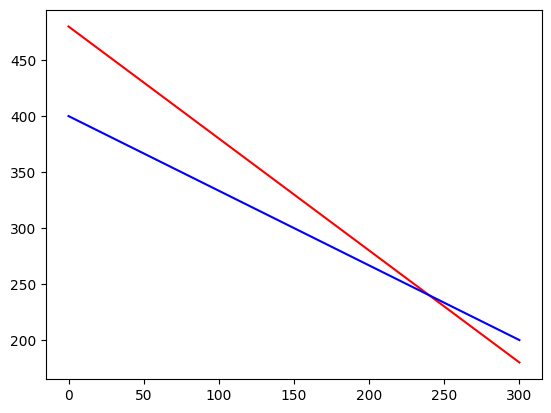

In [52]:
x = [0, 300]
y1 = [480, 180]
y2 = [400, 200]

plt.plot(x, y1, 'r')
plt.plot(x, y2, "b")

plt.show()